# Flight Data EDA

Questions to Answer and explore

1. Analyse the departure delay time to understand the effect on passengers
2. Analyse the arrival delay time to understand the effect on passengers for catching connecting flights or other passengers onboarding the flight
3. From Each unique orgin to unique destination what is the average delay
4. Analyse month wise departure delay to understand if any seasonal pattern
5. which carrier delays the most?
6. Which carriers are the best in terms of on time depature and arrival?
7. Which carriers to avoid flying with?
6. Speed Analysis for each carrier

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
your_local_path='E:/Python/DATA_ANALYSIS_PROJECT/'

In [28]:
flight_df=pd.read_csv(your_local_path+'flight_data.csv')
print(flight_df.shape)
flight_df.head()

(336776, 19)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [29]:
flight_df.info()
print(flight_df[flight_df.isnull().any(axis=1)])
flight_df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB
        year  month  day  dep_time  sched_dep_time 

There are 9430 rows which contain NaN values which is equal to 2.8% of the total dataset(9430/336775).
Thus We Can drop the rows containing NaN values.

In [5]:
#flight_df['avg_delay']=flight_df['dep_delay']+flight_df['arr_delay']
#flight_df.sort_values('avg_delay',ascending=False)

#### Lets Explore Departure delays

In [30]:
flight_df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,327346.0,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,2013.0,6.564803,15.740825,1348.789883,1340.335098,12.555156,1501.908238,1532.788426,6.895377,1943.104501,150.686460,1048.371314,13.141010,26.234116
std,0.0,3.413444,8.777376,488.319979,467.413156,40.065688,532.888731,497.979124,44.633292,1621.523684,93.688305,735.908523,4.662063,19.295918
min,2013.0,1.000000,1.000000,1.000000,500.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,80.000000,5.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,905.000000,-5.000000,1104.000000,1122.000000,-17.000000,544.000000,82.000000,509.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1400.000000,1355.000000,-2.000000,1535.000000,1554.000000,-5.000000,1467.000000,129.000000,888.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1944.000000,14.000000,3412.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [31]:
dep_time_less_than_100=flight_df[flight_df['dep_time']<100].sort_values('dep_time',ascending = True)
dep_time_less_than_100

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
109552,2013,12,30,1.0,2359,2.0,441.0,437,4.0,B6,839,N508JB,JFK,BQN,198.0,1576,23,59,30-12-2013 23:00
212954,2013,5,22,1.0,1935,266.0,154.0,2140,254.0,EV,4361,N27200,EWR,TYS,94.0,631,19,35,22-05-2013 19:00
173629,2013,4,10,1.0,1930,271.0,106.0,2101,245.0,UA,1703,N33203,EWR,BOS,36.0,200,19,30,10-04-2013 19:00
169011,2013,4,5,1.0,2359,2.0,410.0,339,31.0,B6,727,N606JB,JFK,BQN,228.0,1576,23,59,05-04-2013 23:00
275948,2013,7,28,1.0,2359,2.0,423.0,350,33.0,B6,745,N703JB,JFK,PSE,202.0,1617,23,59,28-07-2013 23:00
293338,2013,8,15,1.0,2359,2.0,336.0,340,-4.0,B6,839,N507JB,JFK,BQN,197.0,1576,23,59,15-08-2013 23:00
66931,2013,11,13,1.0,2359,2.0,442.0,440,2.0,B6,1503,N627JB,JFK,SJU,194.0,1598,23,59,13-11-2013 23:00
26076,2013,1,31,1.0,2100,181.0,124.0,2225,179.0,WN,530,N550WN,LGA,MDW,127.0,725,21,0,31-01-2013 21:00
10452,2013,1,13,1.0,2249,72.0,108.0,2357,71.0,B6,22,N206JB,JFK,SYR,41.0,209,22,49,13-01-2013 22:00
96957,2013,12,16,1.0,2359,2.0,447.0,437,10.0,B6,839,N607JB,JFK,BQN,202.0,1576,23,59,16-12-2013 23:00


Departure delay is the time difference between scheduled departure time and actual departure time. The departure time data which are below 100 are producing inconsistent departure delay.There are about 876 rows which has departure time below 100.
So dropping them to reduce inconsistency.

In [32]:
flight_df=flight_df[flight_df['dep_time']>100]
flight_df.sort_values('dep_time',ascending = True)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
133401,2013,2,26,101.0,2359,62.0,550.0,438,72.0,B6,727,N632JB,JFK,BQN,197.0,1576,23,59,26-02-2013 23:00
185898,2013,4,23,101.0,2130,211.0,325.0,16,189.0,B6,383,N516JB,LGA,FLL,133.0,1076,21,30,23-04-2013 21:00
271146,2013,7,23,101.0,2305,116.0,157.0,13,104.0,B6,718,N183JB,JFK,BOS,38.0,187,23,5,23-07-2013 23:00
270152,2013,7,22,101.0,2150,191.0,427.0,100,207.0,AA,185,N332AA,JFK,LAX,329.0,2475,21,50,22-07-2013 21:00
152003,2013,3,18,102.0,2105,237.0,309.0,2259,250.0,EV,4700,N16976,EWR,CLT,98.0,529,21,5,18-03-2013 21:00
175615,2013,4,12,102.0,2150,192.0,402.0,40,202.0,B6,515,N283JB,EWR,FLL,160.0,1065,21,50,12-04-2013 21:00
173639,2013,4,10,102.0,2150,192.0,333.0,40,173.0,B6,515,N258JB,EWR,FLL,135.0,1065,21,50,10-04-2013 21:00
246742,2013,6,27,102.0,2245,137.0,211.0,4,127.0,B6,108,N273JB,JFK,PWM,42.0,273,22,45,27-06-2013 22:00
246741,2013,6,27,102.0,2245,137.0,223.0,3,140.0,B6,486,N258JB,JFK,ROC,50.0,264,22,45,27-06-2013 22:00
233388,2013,6,13,102.0,2059,243.0,205.0,2226,219.0,EV,4119,N19554,EWR,RIC,48.0,277,20,59,13-06-2013 20:00


The average departure delay for this data set is 12.55 mins which is with in 15 mins scheduled departure rule.

In [35]:
flight_df['dep_delay'].mean()

12.235649805948068

In [36]:
df1 = flight_df.sort_values('dep_delay',ascending = False).head(100)
df1

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,09-01-2013 09:00
235778,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,15-06-2013 19:00
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,10-01-2013 16:00
327043,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45,20-09-2013 18:00
270376,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0,22-07-2013 16:00
173992,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,DL,2391,N959DL,JFK,TPA,139.0,1005,19,0,10-04-2013 19:00
151974,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,DL,2119,N927DA,LGA,MSP,167.0,1020,8,10,17-03-2013 08:00
247040,2013,6,27,959.0,1900,899.0,1236.0,2226,850.0,DL,2007,N3762Y,JFK,PDX,313.0,2454,19,0,27-06-2013 19:00
270987,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,DL,2047,N6716C,LGA,ATL,109.0,762,7,59,22-07-2013 07:00
87238,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,AA,172,N5DMAA,EWR,MIA,149.0,1085,17,0,05-12-2013 17:00


But when we look at invidual departure delay the values are surprising.The highest departure delay is 1301 mins which is equivalent to 22 hrs for a flight between JFK and HNL.

In [9]:
#Grouping by Origin and then destination and for each dest the mean departure delay
mean_dep_delay=flight_df.groupby(['origin','dest'])['dep_delay'].mean().sort_values(ascending=False)
mean_dep_delay.head()

origin  dest
EWR     TYS     41.654952
        TUL     34.887755
        CAE     34.361702
LGA     SBN     31.333333
EWR     JAC     29.842105
Name: dep_delay, dtype: float64

THe highest average departure delays are from EWR which is 41.65 mins.
Also we can say that from EWR there is more than average 30 mins delay for destintion TYS,TUL,CAE. 

In [10]:
#mean_dep_delay.unstack(level=0).plot(kind='bar', subplots=True,figsize=(30,20))
#plt.show()

In [11]:
#Grouping by Origin and then destination and for each dest the mean arrival delay
mean_arr_delay=flight_df.groupby(['origin','dest'])['arr_delay'].mean().sort_values(ascending=False)
mean_arr_delay.head()

origin  dest
EWR     CAE     44.585106
        TYS     41.150160
        TUL     33.659864
        OKC     30.619048
        JAC     29.894737
Name: arr_delay, dtype: float64

Again the highest average arrival delays are from EWR which is 44.58 mins.
And again we can say that from EWR there is more than average 30 mins delay for the same destintion TYS,TUL,CAE during arrival

In [12]:
#Lets count the number of flights from each unique origin
No_of_trips=flight_df.groupby('origin')['dest'].count()
No_of_trips

origin
EWR    117127
JFK    109079
LGA    101140
Name: dest, dtype: int64

From EWR we have maximum number of journey which is 117127

In [13]:
#Lets count the number of flights from each unique origin
No_of_trips_per_dest=flight_df.groupby(['origin','dest'])['dest'].count().sort_values(ascending=False)
No_of_trips_per_dest.head(1)

origin  dest
JFK     LAX     11159
Name: dest, dtype: int64

The maximum number of trips to a particular destination is 11159 which is from origin JFX to destination LAX

#### Lets Explore Month Wise delay

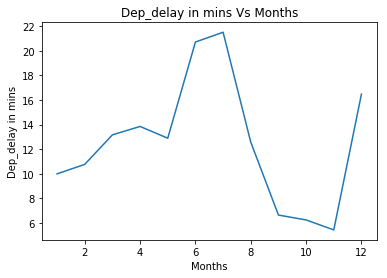

In [12]:
month_dep_delay =flight_df.groupby('month')['dep_delay'].mean()
plt.plot(month_dep_delay)
plt.xlabel('Months')
plt.ylabel('Dep_delay in mins')
plt.title('Dep_delay in mins Vs Months')
plt.show()

From the above graph we can say that during June, July and Dec the departure delay is more. It can be due to Summer and Winter Vacations.

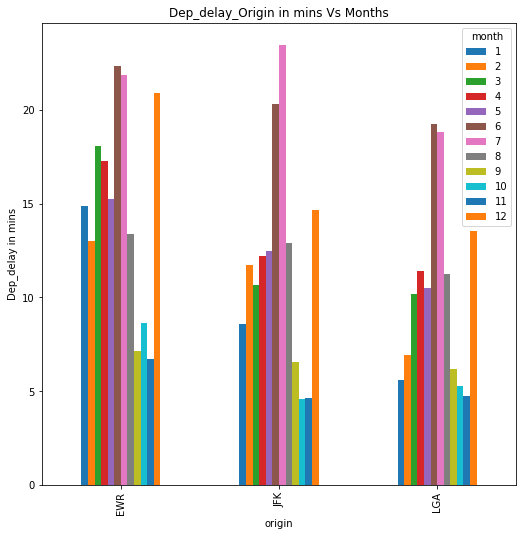

In [13]:
month_dep_delay =flight_df.groupby(['month','origin'])['dep_delay'].mean()
month_dep_delay
month_dep_delay.unstack(level=0).plot(kind='bar',figsize=(8.5,8.5))
plt.ylabel('Dep_delay in mins')
plt.title('Dep_delay_Origin in mins Vs Months')
plt.show()

From the above graph we can see say that even for each Origin the average departure delay is more during June, July and December

In [14]:
#Explore day wise delay
#let us first group by month and day
day_dep_delay_mean=flight_df.groupby(['month','day'])['dep_delay'].mean().sort_values(ascending=False)
day_dep_delay_mean.head(1)

month  day
3      8      83.64787
Name: dep_delay, dtype: float64

The worst day average departure delay is on 8th March 2013 which is 83 mins

#### Lets Explore Carrier wise delay

In [15]:
carrier_delay=flight_df.groupby('carrier')['dep_delay'].mean()
carrier_delay.sort_values(ascending=False)

carrier
F9    20.201175
EV    19.838929
YV    18.898897
FL    18.605984
WN    17.661657
9E    16.439574
B6    12.967548
VX    12.756646
OO    12.586207
UA    12.016908
MQ    10.445381
DL     9.223950
AA     8.569130
AS     5.830748
HA     4.900585
US     3.744693
Name: dep_delay, dtype: float64

Carrier F9 has the highest average departure delay among all the airlines.

In [16]:
carrier_flight_delay=flight_df.groupby(['carrier','flight'])['dep_delay'].mean()
carrier_flight_delay.sort_values(ascending=False)

carrier  flight
WN       521       346.000000
DL       390       334.000000
         809       298.000000
UA       1510      278.000000
EV       5478      242.000000
         5117      219.000000
9E       3760      217.000000
EV       5855      209.000000
WN       1019      203.000000
         217       195.000000
EV       5294      192.000000
DL       1223      171.833333
YV       3799      168.000000
DL       917       157.000000
EV       6082      153.000000
WN       3791      151.000000
US       1226      147.000000
WN       879       128.500000
EV       4617      128.000000
         6093      128.000000
WN       1049      126.000000
DL       462       125.000000
EV       5015      124.000000
         5017      123.333333
9E       3297      120.000000
WN       424       116.000000
UA       640       115.000000
9E       3588      115.000000
US       1857      112.000000
EV       5062      111.000000
                      ...    
         5080       -9.666667
9E       3660      -10.0

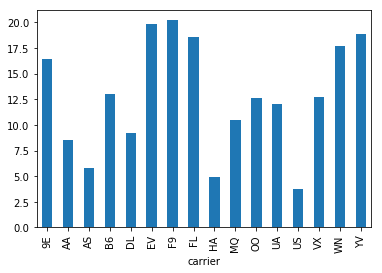

In [17]:
carrier_delay.plot(kind='bar')
plt.show()

In [18]:
# Calculating speed of the  flight
flight_df['speed_in_mph'] = flight_df.distance/(flight_df.air_time/60)
flight_df.sort_values('speed_in_mph',ascending = False).head(1)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_in_mph
216447,2013,5,25,1709.0,1700,9.0,1923.0,1937,-14.0,DL,1499,N666DN,LGA,ATL,65.0,762,17,0,25-05-2013 17:00,703.384615


The aircraft with best speed i.e.,703mph which flied from origin LGA to destination ATL  is from Carrier DL with flight number 1499

#### Lets Analyse the best and worst Lines to fly with

In [19]:
# We will judge the airlines based on departure delay, arrival delay and the speed of the aircraft
dest_delay_speed_mean = flight_df.groupby(['dest','carrier'])['dep_delay','arr_delay'].mean().sort_values(['dep_delay','arr_delay'],ascending=False)
top_5_airline =dest_delay_speed_mean.tail()
print('Based on the deciding factors i.e., departure delay, arrival delay the best carriers for destination are')
print(top_5_airline)
worst_5_airline =dest_delay_speed_mean.head()
print('Based on the deciding factors i.e., departure delay, arrival delay the worst carriers for destination are ')
print(worst_5_airline)

Based on the deciding factors i.e., departure delay, arrival delay the best carriers for destination are
              dep_delay  arr_delay
dest carrier                      
MSP  UA       -6.000000  -5.500000
OMA  DL       -6.000000 -10.000000
IND  UA       -6.666667 -18.333333
LEX  9E       -9.000000 -22.000000
IAD  UA      -10.000000 -24.000000
Based on the deciding factors i.e., departure delay, arrival delay the worst carriers for destination are 
              dep_delay   arr_delay
dest carrier                       
STL  UA       77.500000  110.000000
ORD  OO       67.000000  107.000000
DTW  OO       61.000000   68.500000
RDU  UA       60.000000   56.000000
PBI  EV       48.666667   40.666667
